In [76]:
from itertools import count

from cobra.io import load_model

model = load_model("textbook")  # using textbook e. coli model
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
sugars = []  # sugars have C-H
amino_acids = []  # amino acids have C-N
for met in model.metabolites:  # loop through metabolites and separate using N
    if "N" in met.formula:
        amino_acids.append(met)
    else:
        sugars.append(met)

In [78]:
print(len(sugars))

56


In [93]:
child_1 = {}
child_2 = {}

# goal: append all rxns associated with sugars to sugar list and rxns associated with aa to amino acid list
reactions_sugars = []
reactions_amino_acids = []

for met in model.metabolites:
    if met in sugars:
        sCount += 1
        reactions_sugars.append(model.reactions)  # creating dictionary of sugars {rxn:rxn id}

print(len(reactions_sugars))

for met in model.metabolites:
    if met in amino_acids:
        aCount += 1
        reactions_amino_acids.append(model.reactions)  # creating dictionary of sugars {rxn:rxn id}


56


In [94]:
# check to make sure correct number of reactions appended to each list
print(len(model.reactions))
print(len(reactions_sugars) + len(reactions_amino_acids))

# Why am I missing 13 reactions?

95
72


In [81]:
parent_1 = {}
parent_2 = {}

for met in model.metabolites:
    if met in sugars:
        parent_1[met.formula] = child_1

for met in model.metabolites:
    if met in amino_acids:
        parent_2[met.formula] = child_2
grandparent = {"sugars": parent_1, "amino acids": parent_2}
pprint(grandparent) # {classification:{metabolite:{rxn:rxn_id}}}

{'amino acids': {'C10H12N5O10P2': {},
                 'C10H12N5O13P3': {},
                 'C10H12N5O7P': {},
                 'C21H25N7O17P3': {},
                 'C21H26N7O14P2': {},
                 'C21H26N7O17P3': {},
                 'C21H27N7O14P2': {},
                 'C21H32N7O16P3S': {},
                 'C23H34N7O17P3S': {},
                 'C25H35N7O19P3S': {},
                 'C5H10N2O3': {},
                 'C5H8NO4': {},
                 'H4N': {}},
 'sugars': {'C2H1O3': {},
            'C2H3O2': {},
            'C2H3O5P': {},
            'C2H4O': {},
            'C2H6O': {},
            'C3H2O6P': {},
            'C3H3O3': {},
            'C3H4O10P2': {},
            'C3H4O7P': {},
            'C3H5O3': {},
            'C3H5O6P': {},
            'C49H74O4': {},
            'C49H76O4': {},
            'C4H2O4': {},
            'C4H2O5': {},
            'C4H4O4': {},
            'C4H4O5': {},
            'C4H7O7P': {},
            'C5H4O5': {},
            'C5H9O8P

In [82]:
# check to make sure correct number of metabolites appended to each list
print(len(model.metabolites))
len(sugars) + len(amino_acids)

72


72

In [83]:
# metabolites_df = pd.DataFrame(grandparent, columns=["sugars", "amino acids"])
#
# print(metabolites_df)

In [99]:
metabolite_df = pd.DataFrame(grandparent).T
print(metabolite_df)
# If "NaN," that means that the reaction does not take place because it is not an amino acid or sugar

            C3H4O10P2 C3H4O7P C6H10O10P C6H9O9P C2H3O2 C2H4O C6H3O6 C2H3O5P  \
sugars             {}      {}        {}      {}     {}    {}     {}      {}   
amino acids       NaN     NaN       NaN     NaN    NaN   NaN    NaN     NaN   

            C5H4O5 C6H5O7  ... C10H12N5O13P3 C21H32N7O16P3S C5H10N2O3 C5H8NO4  \
sugars          {}     {}  ...           NaN            NaN       NaN     NaN   
amino acids    NaN    NaN  ...            {}             {}        {}      {}   

            C21H26N7O14P2 C21H27N7O14P2 C21H25N7O17P3 C21H26N7O17P3  H4N  \
sugars                NaN           NaN           NaN           NaN  NaN   
amino acids            {}            {}            {}            {}   {}   

            C25H35N7O19P3S  
sugars                 NaN  
amino acids             {}  

[2 rows x 47 columns]


In [85]:
for i in metabolite_df:
    for j in metabolite_df[i]:
        print(j) # reactions

for i in metabolite_df:
    for j in metabolite_df[i]:
        print(i) # metabolites

{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
nan
{}
C3H4O10P2
C3H4O10P2
C3H4O7P
C3H4O7P
C6H10O10P
C6H10O10P
C6H9O9P
C6H9O9P
C2H3O2
C2H3O2
C2H4O
C2H4O
C6H3O6
C6H3O6
C2H3O5P
C2H3O5P
C5H4O5
C5H4O5
C6H5O7
C6H5O7
CO2
CO2
C3H5O6P
C3H5O6P
C4H7O7P
C4H7O7P
C2H6O
C2H6O
C6H11O9P
C6H11O9P
C6H10O12P2
C6H10O12P2
CH1O2
CH1O2
C6H12O6
C6H12O6
C4H2O4
C4H2O4
C2H1O3
C2H1O3
H2O
H2O
H
H
C3H5O3
C3H5O3
C4H4O5
C4H4O5
O2
O2
C4H2O5
C4H2O5
C3H2O6P
C3H2O6P
HO4P
HO4P
C3H3O3
C3H3O3
C49H74O4
C49H74O4
C49H76O4
C49H76O4
C5H9O8P
C5H9O8P
C7H13O10P
C7H13O10P
C4H4O4
C4H4O4
C23H34N7O17P3S
C23H34N7O17P3S
C10H12N5O10P2
C10H12N5O10P2
C10H12N5O7P
C10H12N5O7P
C10H12N5O13P3
C10H12N5O13P3
C21H32N7O16P3S
C21H32N7O16P3S
C5H10N2O3
C5H10N2O3
C5H8NO4
C5H8NO4
C21H2

In [86]:
metabolites = ["Sugars", "Amino Acids"]
num_rxns = [len(reactions_sugars), len(reactions_amino_acids)] # there are 5320 rxns associated with sugar metabolites and 1520 rxns associated with aa metabolites # this is way too many

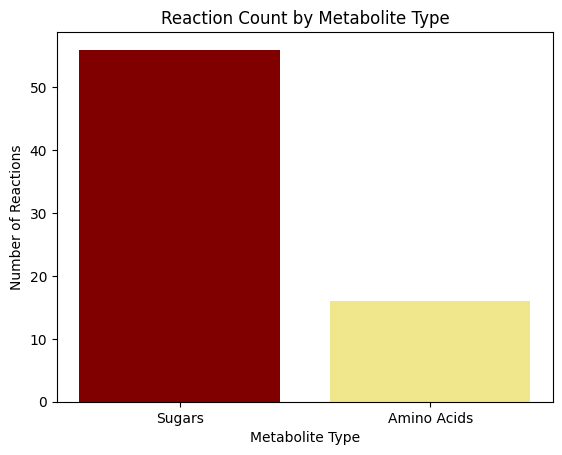

In [87]:
import matplotlib.pyplot as plt

plt.bar(metabolites, num_rxns)
# type(plt.bar)
plt.xlabel("Metabolite Type")
plt.ylabel("Number of Reactions")
plt.title("Reaction Count by Metabolite Type" )
colors = ["maroon", "khaki"]

plt.bar(metabolites, num_rxns, color = colors)

plt.show()